# Exploratory Data Analysis
### Research Question: what are the main noticiable conclusions can be made from the dataset?

# Content:
### Section 01. Exploring of dataset as a wole and each individual variable: with conclusions
##### Note: missign values changes to 0 before proceeding with the next sections 
### Section 02. Exploring the relationship between each variable and the target: with conclusions
### Section 03. Assessing interactions between variables: with conclusions
##### Note: Mainly the relationships between variables where the meaning was found are presented in this section.
### Section 04. Exploring data across many dimensions: with conclusions
##### Note: Mainly the relationships between variables where the meaning was found are presented in this section.
### Answer to Research Question

In [86]:
# Import necessary libraries
import sqlite3
import pandas as pd
import os
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns  
import numpy as np
import plotly.express as px
from sklearn.preprocessing import OrdinalEncoder

pd.set_option('display.max_column', None)
pd.plotting.register_matplotlib_converters()

print("Setup Complete")

Setup Complete


In [87]:
# Path of the file to read
train_filepath = "train.csv"

# Read the file into a variable
train_data = pd.read_csv(train_filepath)

### Section 01. Exploring of dataset as a wole and each individual variable

In [88]:
print("first 5 rows of the dataset: ")
train_data.head()

first 5 rows of the dataset: 


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,1,1,"Oconnor, Frankie",male,NaN,2,0,209245,27.14,C12239,S
1,1,0,3,"Bryan, Drew",male,NaN,0,0,27323,13.35,NaN,S
2,2,0,3,"Owens, Kenneth",male,0.33,1,2,CA 457703,71.29,NaN,S
3,3,0,3,"Kramer, James",male,19.00,0,0,A. 10866,13.04,NaN,S
4,4,1,3,"Bond, Michael",male,25.00,0,0,427635,7.76,NaN,S


In [89]:
print("statistical summary of the dataset: ")
train_data.describe()

statistical summary of the dataset: 


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,100000.000000,100000.000000,100000.000000,96708.000000,100000.000000,100000.000000,99866.00000
mean,49999.500000,0.427740,2.106910,38.355472,0.397690,0.454560,43.92933
std,28867.657797,0.494753,0.837727,18.313556,0.862566,0.950076,69.58882
min,0.000000,0.000000,1.000000,0.080000,0.000000,0.000000,0.68000
25%,24999.750000,0.000000,1.000000,25.000000,0.000000,0.000000,10.04000
50%,49999.500000,0.000000,2.000000,39.000000,0.000000,0.000000,24.46000
75%,74999.250000,1.000000,3.000000,53.000000,1.000000,1.000000,33.50000
max,99999.000000,1.000000,3.000000,87.000000,8.000000,9.000000,744.66000


In [90]:
print("Dataset statistics: The number of variables in the dataset: ")
print(train_data.shape[1])

print("Dataset statistics: Number of observations: ")
print(train_data.shape[0])

print("Dataset statistics: Missing cells: ")
print(train_data.isnull().sum().sum())

print("Dataset statistics: Missing cells (%): ")
print(round(train_data.isnull().sum().sum()*100/(train_data.shape[0]*train_data.shape[1]),2))

print("Dataset statistics: Duplicate rows: ")
print(train_data[train_data.duplicated()].shape[0])

print("Dataset statistics: Duplicate rows (%): ")
print(round(train_data[train_data.duplicated()].shape[0]*100/train_data.shape[0],1))

print("Dataset statistics: Total size in memory, MB: ")
print(train_data.memory_usage().sum()/1000000)

print("Dataset statistics: Average record size in memory, B: ")
print(train_data.memory_usage().sum()/train_data.shape[0])


Dataset statistics: The number of variables in the dataset: 
12
Dataset statistics: Number of observations: 
100000
Dataset statistics: Missing cells: 
76165
Dataset statistics: Missing cells (%): 
6.35
Dataset statistics: Duplicate rows: 
0
Dataset statistics: Duplicate rows (%): 
0.0
Dataset statistics: Total size in memory, MB: 
9.600128
Dataset statistics: Average record size in memory, B: 
96.00128


In [91]:
# replace all NA's with 0
clean_train_data = train_data.fillna(0)
clean_train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,1,1,"Oconnor, Frankie",male,0.00,2,0,209245,27.14,C12239,S
1,1,0,3,"Bryan, Drew",male,0.00,0,0,27323,13.35,0,S
2,2,0,3,"Owens, Kenneth",male,0.33,1,2,CA 457703,71.29,0,S
3,3,0,3,"Kramer, James",male,19.00,0,0,A. 10866,13.04,0,S
4,4,1,3,"Bond, Michael",male,25.00,0,0,427635,7.76,0,S


In [92]:
print("Variable Survived description: values type")
print(clean_train_data['Survived'].dtype.name)
print("Variable Survived description: the number of unique values")
clean_train_data['Survived'].nunique()  

Variable Survived description: values type
int64
Variable Survived description: the number of unique values


2

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Survived'>

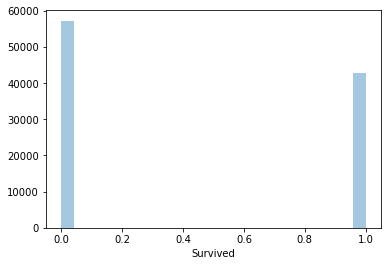

In [93]:
# Histogram 
sns.distplot(a=clean_train_data['Survived'], kde=False)

Conclusion_01: Variable Survived is a categorical numerical variable which can take two values. Survived is a target. 
Most of the passengers died (did not survive) in this dataset.

In [94]:
print("Variable Pclass description: values type")
print(clean_train_data['Pclass'].dtype.name)
print("Variable Pclass description: the number of unique values")
clean_train_data['Pclass'].nunique()  

Variable Pclass description: values type
int64
Variable Pclass description: the number of unique values


3

<AxesSubplot:xlabel='Pclass'>

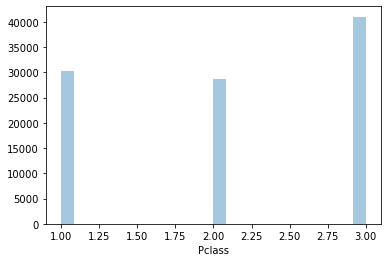

In [95]:
# Histogram 
sns.distplot(a=clean_train_data['Pclass'], kde=False)

Conclusion_02: Variable Pclass is a categorical numerical variable which can take three values.

In [96]:
print("Variable Name description: values type")
print(clean_train_data['Name'].dtype.name)
print("Variable Name description: the number of unique values")
clean_train_data['Name'].nunique() 

Variable Name description: values type
object
Variable Name description: the number of unique values


92144

Conclusion_03: Variable Name is not a categorical variable. Object type means most probably a string, also obvious from the context.

In [97]:
print("Variable Sex description: values type")
print(clean_train_data['Sex'].dtype.name)
print("Variable Sex description: the number of unique values")
clean_train_data['Sex'].nunique() 

Variable Sex description: values type
object
Variable Sex description: the number of unique values


2

Conclusion_04: Variable Sex is a categorical object (most probably string) variable which can take two values.

In [98]:
print("Variable Age description: values type")
print(clean_train_data['Age'].dtype.name)
print("Variable Age description: the number of unique values")
clean_train_data['Age'].nunique() 

Variable Age description: values type
float64
Variable Age description: the number of unique values


174

<AxesSubplot:xlabel='Age'>

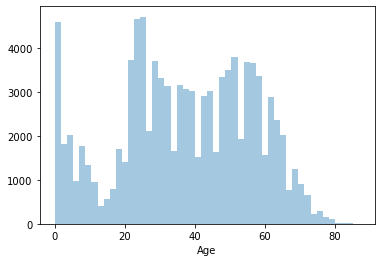

In [99]:
# Histogram 
sns.distplot(a=clean_train_data['Age'], kde=False)

Conclusion_05: Variable Age is not categorical numerical variable. Please see also above the histogram for the variable Age: pasengers age is between: 0 - 80, pasengers between 22-25 years are the most presented in the dataset. Aparently Age == 0 is presented a lot in the dataset because there were a lot of NaN that became 0.

In [100]:
print("Variable SibSp description: values type")
print(clean_train_data['SibSp'].dtype.name)
print("Variable SibSp description: the number of unique values")
clean_train_data['SibSp'].nunique() 

Variable SibSp description: values type
int64
Variable SibSp description: the number of unique values


7

<AxesSubplot:xlabel='SibSp'>

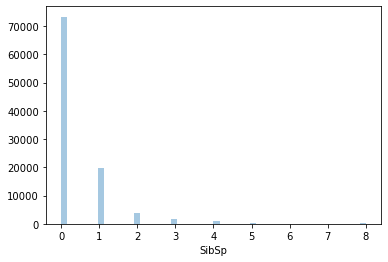

In [101]:
# Histogram 
sns.distplot(a=clean_train_data['SibSp'], kde=False)

Conclusion_06: Variable SibSp  is a categorical numerical variable which can take seven values. We set to 0 all NaN so it may be that 0 was previously NaN and presented the most int he dataset. 

In [102]:
print("Variable Parch description: values type")
print(clean_train_data['Parch'].dtype.name)
print("Variable Parch description: the number of unique values")
clean_train_data['Parch'].nunique()

Variable Parch description: values type
int64
Variable Parch description: the number of unique values


8

<AxesSubplot:xlabel='Parch'>

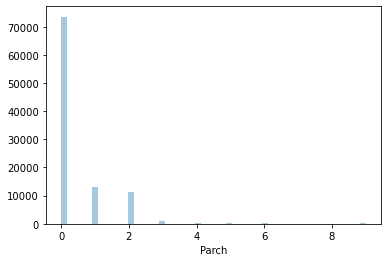

In [103]:
# Histogram 
sns.distplot(a=clean_train_data['Parch'], kde=False)

Conclusion_07: Variable Parch is a categorical numerical variable which can take eight values.

In [104]:
print("Variable Ticket description: values type")
print(clean_train_data['Ticket'].dtype.name)
print("Variable Ticket description: the number of unique values")
clean_train_data['Ticket'].nunique()

Variable Ticket description: values type
object
Variable Ticket description: the number of unique values


75332

Conclusion_08: Variable Ticket is not categorical variable of type object (most probably a string).

In [105]:
print("Variable Fare description: values type")
print(clean_train_data['Fare'].dtype.name)
print("Variable Fare description: the number of unique values")
clean_train_data['Fare'].nunique()

Variable Fare description: values type
float64
Variable Fare description: the number of unique values


15936

<AxesSubplot:xlabel='Fare'>

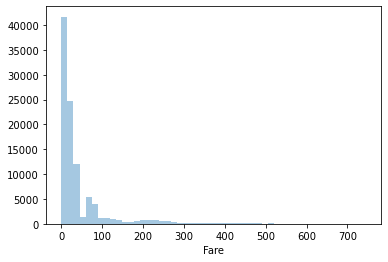

In [106]:
# Histogram 
sns.distplot(a=clean_train_data['Fare'], kde=False)

Conclusion_09: Variable Fare is not categorical numerical variable. There are more cheap tickets rather then expensive in this dataset.

In [107]:
print("Variable Cabin description: values type")
print(clean_train_data['Cabin'].dtype.name)
print("Variable Cabin description: the number of unique values")
clean_train_data['Cabin'].nunique()

Variable Cabin description: values type
object
Variable Cabin description: the number of unique values


26993

Conclusion_10: Variable Cabin is not categorical variable of type object (most probably a string).

In [108]:
print("Variable Embarked description: values type")
print(clean_train_data['Embarked'].dtype.name)
print("Variable Embarked description: the number of unique values")
clean_train_data['Embarked'].nunique() 

Variable Embarked description: values type
object
Variable Embarked description: the number of unique values


4

Conclusion_11: Variable Embarked is a categorical variable of type object (most probably a string) which takes three values.

### Section 02. Exploring the relationship between each variable and the target

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

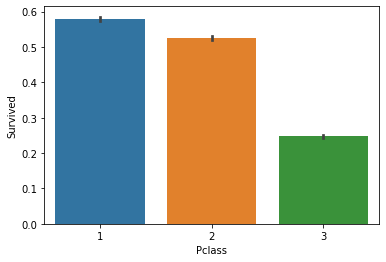

In [109]:
# Bar chart 
sns.barplot(x=clean_train_data['Pclass'], y=clean_train_data['Survived'])

Conclusion_12: There are less survived in the Pcalss == 3 

<AxesSubplot:xlabel='Sex', ylabel='Survived'>

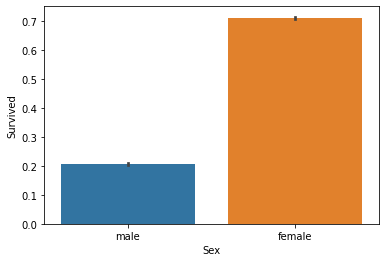

In [110]:
# Bar chart 
sns.barplot(x=clean_train_data['Sex'], y=clean_train_data['Survived'])

Conclusion_13: More female survived.

<AxesSubplot:xlabel='Age', ylabel='Survived'>

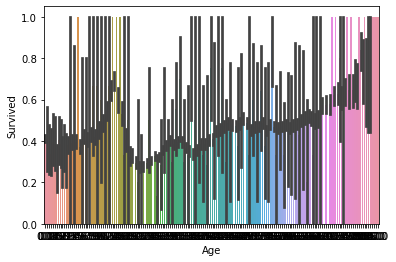

In [111]:
# Bar chart 
sns.barplot(x=clean_train_data['Age'], y=clean_train_data['Survived'])

Conclusion_14: Most probably there is no obvious dependancy between Age and Survived or it is not detected via barplot.

<AxesSubplot:xlabel='SibSp', ylabel='Survived'>

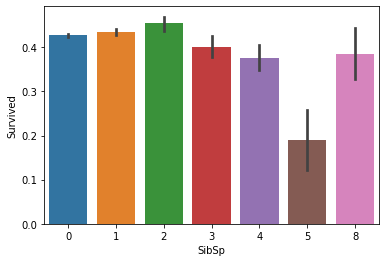

In [112]:
# Bar chart 
sns.barplot(x=clean_train_data['SibSp'], y=clean_train_data['Survived'])

Conclusion_15: less survived are in SibSp == 5

<AxesSubplot:xlabel='Parch', ylabel='Survived'>

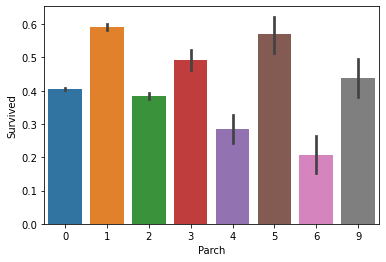

In [113]:
# Bar chart 
sns.barplot(x=clean_train_data['Parch'], y=clean_train_data['Survived'])

Conclusion_16: difficult to make obvious conlcusion between Parch and Survived from the graph above.

<AxesSubplot:xlabel='Embarked', ylabel='Survived'>

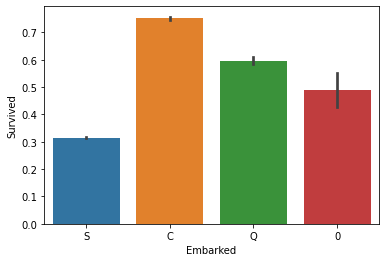

In [114]:
# Bar chart 
sns.barplot(x=clean_train_data['Embarked'], y=clean_train_data['Survived'])

Conclusion_17: Considerably less Survived are in Embarked == S

### Section 03. Assessing interactions between variables

Note: Mainly the relationships between variables where the meaning was found are presented in this section.

<AxesSubplot:xlabel='Parch', ylabel='Fare'>

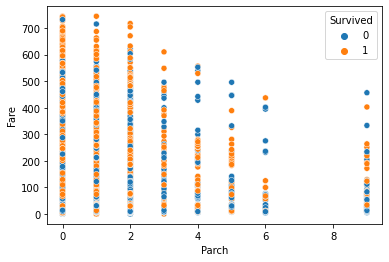

In [115]:
#Scatter plot
sns.scatterplot(x=clean_train_data['Parch'], y=clean_train_data['Fare'], hue=clean_train_data['Survived'])

Conclusion_18: Passengers paid more for tictet (Fare) when Parch is lower.

<AxesSubplot:xlabel='Pclass', ylabel='Fare'>

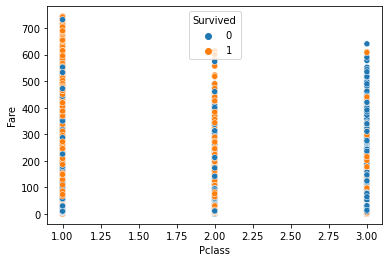

In [116]:
#Scatter plot
sns.scatterplot(x=clean_train_data['Pclass'], y=clean_train_data['Fare'], hue=clean_train_data['Survived'])

Conclusion_19: Similar conclusion as was seen before: most of the passengers died who were travelling in Pclass == 3, i.e with cheaper tickets, see related also Conclusion_12.

<AxesSubplot:xlabel='Age', ylabel='Fare'>

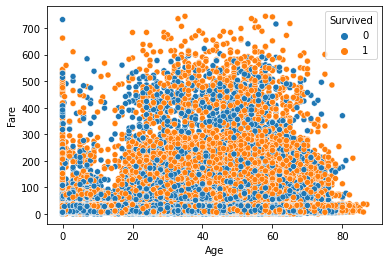

In [117]:
#Scatter plot
sns.scatterplot(x=clean_train_data['Age'], y=clean_train_data['Fare'], hue=clean_train_data['Survived'])

Conclusion_20: There is no obvious correlation between ticket price (Fare) and age of the passengers.

In [118]:
# Describing categorical data with crosstabs
pd.crosstab(clean_train_data['Pclass'], clean_train_data['Parch'])

Parch,0,1,2,3,4,5,6,9
Pclass,,,,,,,,
1,21888,3001,4537,519,154,109,26,81
2,20166,5965,2042,177,68,117,54,90
3,31486,4030,4657,287,224,105,124,93


Conclusion_21: The less Parch is the higher Pclass is (however class is lower when its number is higher - meaning) the max in this cross table is when Parch is 0 and Pclass is 3. Meaning: in the lower class (here the lower class means higher Pclass number since 1st class is the best) seats parct is also low.

In [119]:
# Describing categorical data with crosstabs
pd.crosstab(clean_train_data['Pclass'], clean_train_data['SibSp'])

SibSp,0,1,2,3,4,5,8
Pclass,,,,,,,
1,19483,8714,1368,525,154,24,47
2,22125,4283,1329,293,483,40,126
3,31700,6761,1006,817,531,68,123


Conclusion_22: More often if the seat class is lower then the SibSp is alose lower.

In [120]:
object_cols = ['Sex']

# Apply ordinal encoder to each variable Sex
# Make copy to avoid changing original data 
clean_encoded_train_data = clean_train_data.copy()

# Apply ordinal encoder to each column with categorical data
ordinal_encoder = OrdinalEncoder()
clean_encoded_train_data[object_cols] = ordinal_encoder.fit_transform(clean_train_data[object_cols])

clean_encoded_train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,1,1,"Oconnor, Frankie",1.0,0.00,2,0,209245,27.14,C12239,S
1,1,0,3,"Bryan, Drew",1.0,0.00,0,0,27323,13.35,0,S
2,2,0,3,"Owens, Kenneth",1.0,0.33,1,2,CA 457703,71.29,0,S
3,3,0,3,"Kramer, James",1.0,19.00,0,0,A. 10866,13.04,0,S
4,4,1,3,"Bond, Michael",1.0,25.00,0,0,427635,7.76,0,S


Now in clean_encoded_train_data Sex is encoded with ordinal encoder and 0 == male, 1 == female. It will not be used broadly in the grpaphs below, however good to have in case it is necessary and and also show that this can be done.

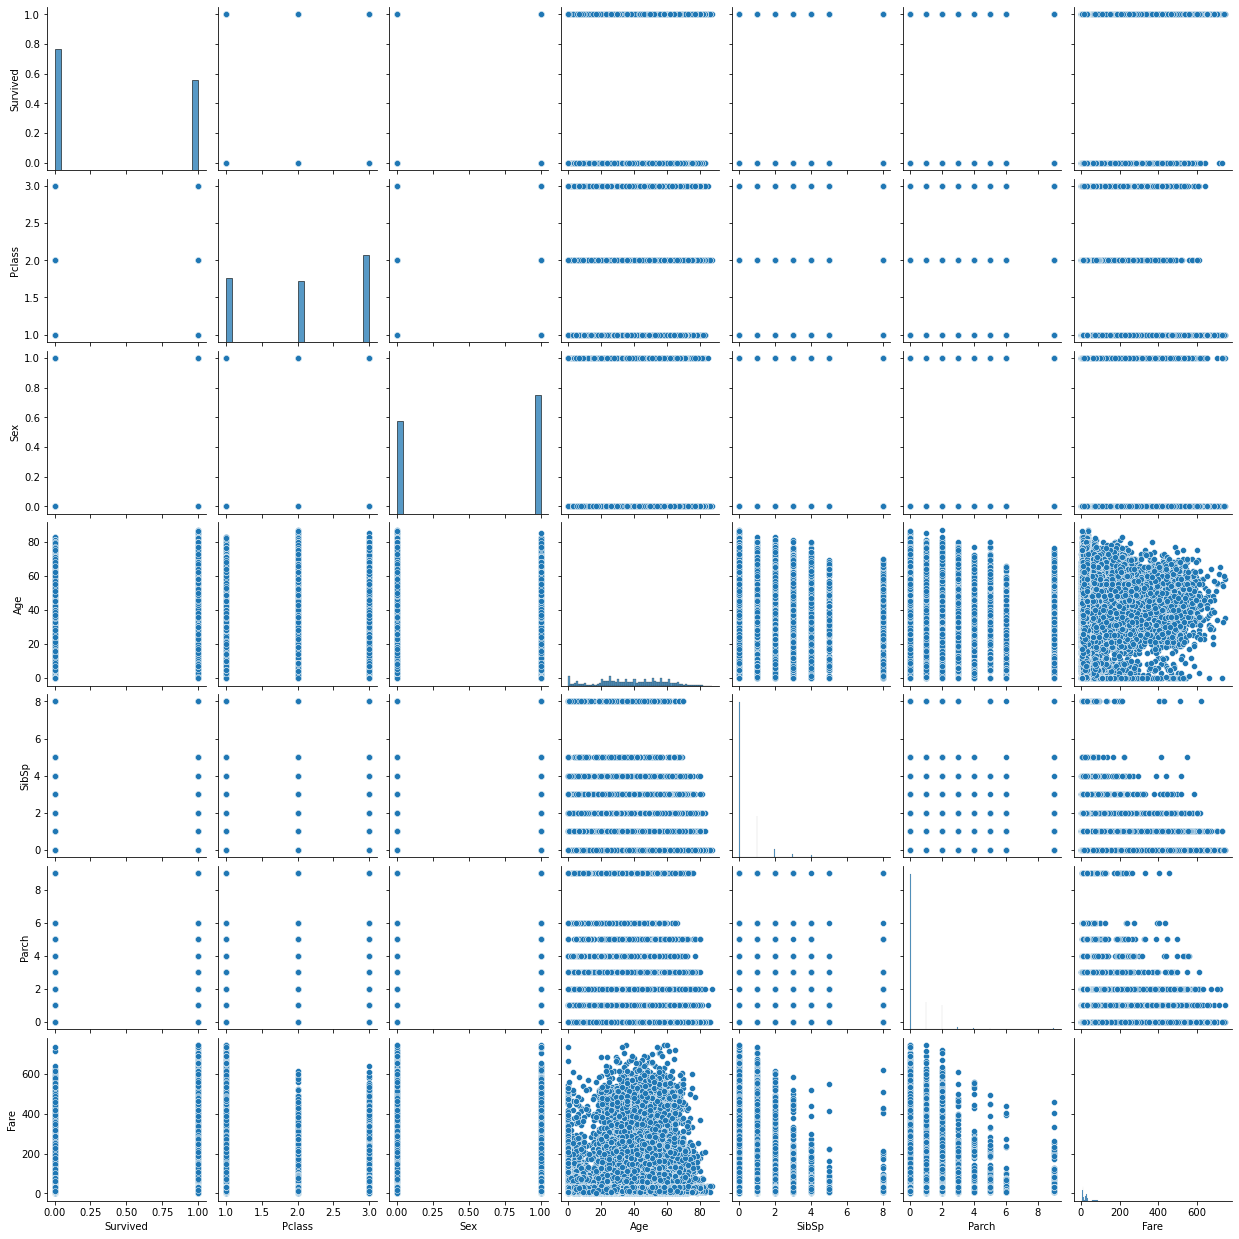

In [121]:
# take subset of the variables that can be intresting to look into correlation between all together
X = clean_encoded_train_data[['Survived','Pclass','Sex','Age','SibSp','Parch','Fare','Embarked']]

sns.pairplot(X)

Conclusion_23: one of the observations that is noticeable from the correlation matrix is that the ticket price (Fare) is lower for passengers with lower Age (which is also natural and iunderstandable conclusion from a real life).

### Section 04. Exploring data across many dimensions

Note: Mainly the relationships between variables where the meaning was found are presented in this section.

<AxesSubplot:title={'center':'Average by Pclass'}, ylabel='Pclass'>

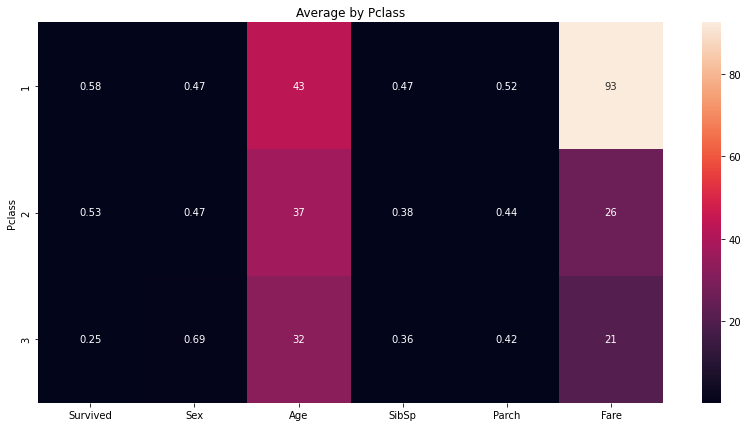

In [122]:
X_grouped = X.groupby(X['Pclass']).mean()

# Set the width and height of the figure
plt.figure(figsize=(14,7))

# Add title
plt.title("Average by Pclass")

# Heatmap showing average/mean in each numarical variable grouped by Pclass (seat class)
sns.heatmap(data=X_grouped, annot=True)

Conclusion_24: in the first class most of the passengers survived, the average age of survived in the first class is 45 year old, passengers also paid the most for the first class.  

<AxesSubplot:title={'center':'Average by Survived'}, ylabel='Survived'>

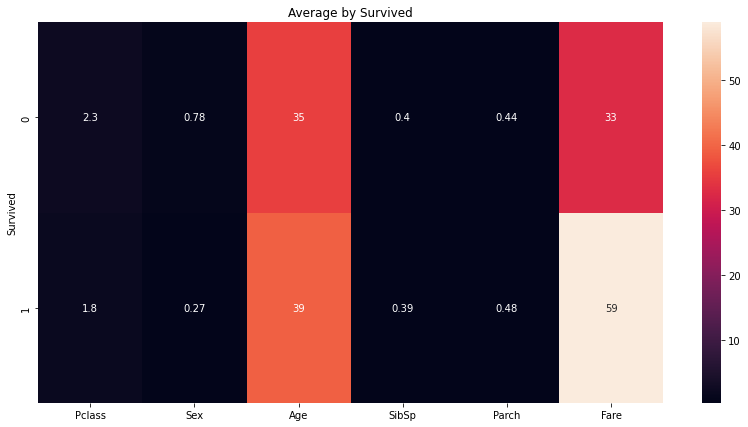

In [123]:
X_grouped = X.groupby(X['Survived']).mean()

# Set the width and height of the figure
plt.figure(figsize=(14,7))

# Add title
plt.title("Average by Survived")

# Heatmap showing average/mean in each numarical variable grouped by Survived
sns.heatmap(data=X_grouped, annot=True)

Conclusion_25: Those passengers who survived defenitelly paied the most price for their seats. Looks like Age, SibSP and Parch are spread aproximatelly equally between Survived and not survived and their influence on the taret is not obvious (even if there is any influence/dependance...).

<AxesSubplot:title={'center':'Average by Sex'}, ylabel='Sex'>

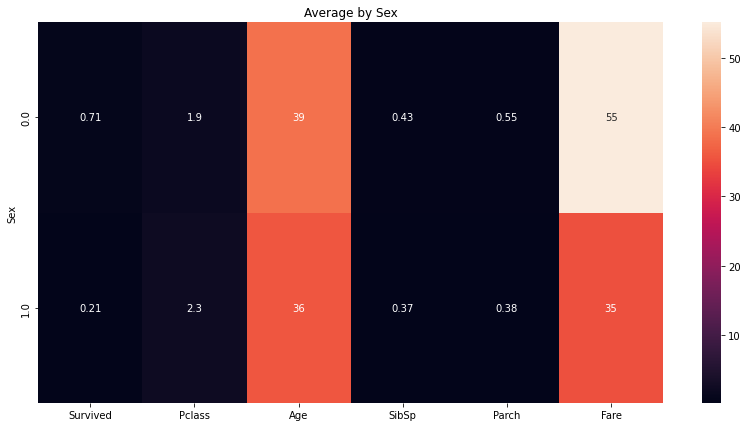

In [124]:
X_grouped = X.groupby(X['Sex']).mean()

# Set the width and height of the figure
plt.figure(figsize=(14,7))

# Add title
plt.title("Average by Sex")

# Heatmap showing average/mean in each numarical variable grouped by Sex
sns.heatmap(data=X_grouped, annot=True)

# Answer to Research Question
## Conclusion_26: MAIN CONCLUSION: From the heatmat above several previously made conclusions can be summarized:
### Women pay more money for their tickets (Fare), they buy higher classes (mainly 1st and 2nd classes) tickets [I would say that women buy more expensice tickets because of the better service during the flight] and as a result of seating in a higher class they survive more often.

Obsiously there is a reason why there are seat classes, not only becasue of the services provided during the flight and more comfortable seats, class also is defined by how close the exits are located and most probably by technical characteristics of the plain for the area where the seats are located.